In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn3
import matplotlib
%matplotlib inline

In [2]:
figures_folder = Path().resolve().parent / "figures"
csv_path = Path().resolve().parent / "data" / "Participant_Info.csv"
df = pd.read_csv(csv_path)
df = df[df["Participant"] != 0] # get rid of pilot participant
df.head()

,Participant,Song,Start frame,Performance order,Genre?,comfort on 5,Performance technique?,practicing technique?,age?,sex,training,Amount of years playing,Practice per week,agrees with our definition of technique
6,1,So What,2488,NaN,cool jazz,4.0,NaN,NaN,37.0,Male,Bmus Jazz,25.0,21-28,yes
7,1,Juju,2373,NaN,jazz latin,3.5,NaN,NaN,37.0,Male,Bmus Jazz,25.0,21-28,yes
8,1,Bloodline,2086,NaN,heavy metal,5.0,NaN,NaN,37.0,Male,Bmus Jazz,25.0,21-28,yes
9,1,GoIntoTheWater,2313,NaN,heavy metal,4.0,NaN,NaN,37.0,Male,Bmus Jazz,25.0,21-28,yes
10,1,BackInBlack,3232,NaN,Rock,5.0,NaN,NaN,37.0,Male,Bmus Jazz,25.0,21-28,yes


## DF with just participant-level info
(not song-level info)

In [3]:
csv_path = Path().resolve().parent / "data" / "Participant-level-info.csv"
ptps = pd.read_csv(csv_path, index_col="Participant")
ptps

,age?,sex,training,training_standardized,BMus,Private lessons,Artist diploma,Amount of years playing,Practice per week,agrees with our definition of technique
Participant,,,,,,,,,,
1,37,Male,Bmus Jazz,BMus,1,0,0,25,21-28,yes
2,21,Male,"Private lessons, 3year Bmus Jazz","BMus, private lessons",1,1,0,8,14-21,yes
3,19,Male,"Private lessons, 3year Bmus Jazz","BMus, private lessons",1,1,0,10,21-35,yes
4,23,Male,3year Bmus,BMus,0,0,0,11,21-35,yes
5,20,Male,"Bmus Percussion, 3Year",BMus,1,0,0,12,21-35,yes
6,21,Male,"Bmus Percussion, 3Year",BMus,1,0,0,17,6.5-7.5,yes
7,28,Male,"Bmus, artist diploma","BMus, Artist diploma",1,0,1,17,14-28,yes
8,51,Male,private lessons,Private lessons,0,1,0,30,14-21,yes
9,36,male,Bmus Jazz,BMus,1,0,0,29,14-21,yes


# visualizations

Text(0.5, 1.0, 'Drummer education')

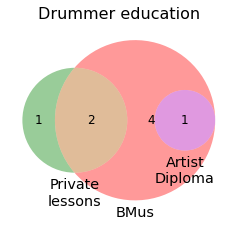

In [4]:
matplotlib.rcParams.update({'font.size': 12})

bmus = set(ptps[ptps["BMus"] > 0].index)
pl = set(ptps[ptps["Private lessons"] > 0].index)
ad = set(ptps[ptps["Artist diploma"] > 0].index)

plt.figure(figsize=(4,4))
venn3([bmus, pl, ad], ("BMus", "Private\nlessons", "Artist\nDiploma"), alpha=.4)
plt.title('Drummer education', fontsize=16)



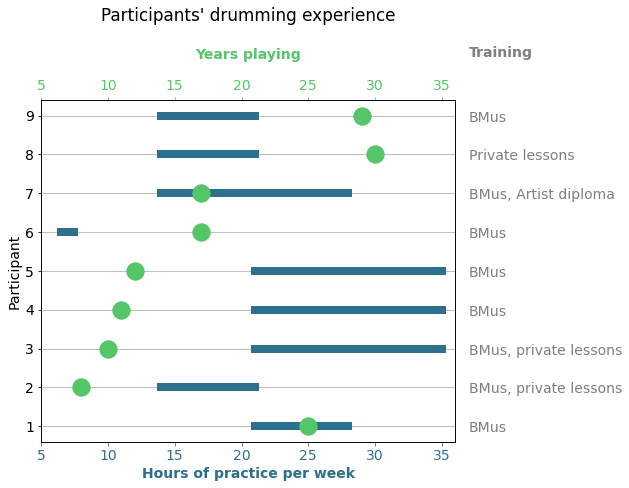

In [5]:
matplotlib.rcParams.update({'font.size':14})

fig = plt.figure(figsize=(9,7))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

hours_color = '#2D708EFF'
train_color = 'tab:gray'
years_color= '#55C667FF'

for i_ptp, row in ptps.iterrows():
    practice_range = row['Practice per week']
    min_, max_ = practice_range.split('-')
    ax1.plot([float(min_), float(max_)], [i_ptp, i_ptp], lw=8, color=hours_color, )
    ax1.text(x=37, y=i_ptp-0.15, s=row['training_standardized'], color=train_color)
    
ax1.text(x=37, y=10.5, s="Training", weight='bold', color=train_color)
    
ax1.set_ylabel('Participant', )
ax1.tick_params(axis='y', colors='k')


ax1.set_xlabel('Hours of practice per week', weight='bold', color=hours_color)
ax1.grid(axis='y')
ax1.tick_params(axis='x', colors=hours_color)
ax1.set_xlim((5,36))


ax2.scatter(x=ptps["Amount of years playing"], y=ptps.index, color=years_color, s=300, )
ax2.set_xlabel('Years playing\n', weight='bold', color=years_color)
ax2.tick_params(colors=years_color, which='major')
ax2.set_xlim((5,36))

plt.title("Participants' drumming experience\n")
plt.tight_layout()
# sns.despine()
plt.savefig(figures_folder / "1_participant_experience.svg")

In [6]:
csv_path = Path().resolve().parent / "data" / "song-level-info.csv"
songs = pd.read_csv(csv_path)

song_genres = {
    "Bloodline": "Heavy metal",
    "GoIntoTheWater": "Heavy metal",
    "BackInBlack": "Rock",
    "TheOcean": "Rock",
    "Juju": "Jazz",
    "SoWhat": "Jazz",
}

participant_numbers = np.arange(1, 10) # numbers 1 to 9


song_labels = ["%s\n(%s)"%(song, genre) for song, genre in song_genres.items()]

song_by_ptp = pd.DataFrame(columns=list(song_genres.keys()), index=participant_numbers, dtype='float')

for i_row, row in songs.iterrows():
    song_by_ptp.loc[row["Participant"], row['Song']] = row["comfort on 5"]
song_by_ptp = song_by_ptp.loc[::-1]
song_by_ptp

,Bloodline,GoIntoTheWater,BackInBlack,TheOcean,Juju,SoWhat
9,4.0,3.5,5.0,4.5,4.5,5.0
8,3.0,5.0,5.0,4.0,4.0,3.5
7,5.0,4.5,5.0,5.0,2.0,3.0
6,4.0,5.0,5.0,5.0,3.5,3.5
5,4.5,4.5,5.0,5.0,2.5,3.0
4,2.5,3.0,5.0,5.0,4.0,5.0
3,3.0,3.0,5.0,4.5,5.0,5.0
2,2.0,3.0,5.0,5.0,5.0,5.0
1,5.0,4.0,5.0,5.0,3.5,4.0


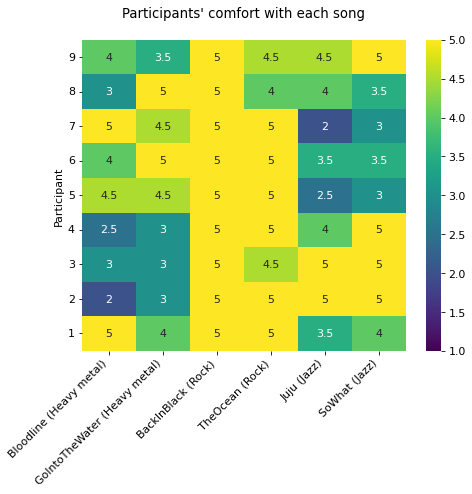

In [7]:
matplotlib.rcParams.update({'font.size':11})
cmap = 'viridis'

fig, ax = plt.subplots(figsize=(7,7))
g = sns.heatmap(song_by_ptp, annot=True, cmap=cmap, vmin=1, vmax=5)
# plt.xlabel('Song')
plt.ylabel('Participant')
plt.title("Participants' comfort with each song\n")
xticklabels = ["%s (%s)"%(song, genre) for song, genre in song_genres.items()]

g.set_xticklabels(xticklabels, rotation=45, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
# ax.set_xticklabels(song_labels)
plt.tight_layout()
plt.savefig(figures_folder / "2_comfort_with_each_song.svg")

In [8]:
# ptps = pd.DataFrame(columns=df.columns)

# for i, group in df.groupby('Participant'):
#     first_row = group.iloc[0]
#     ptps = ptps.append(first_row)
    
# cols = [
#     'Participant',
#     'age?',
#     'sex',
#     'training',
#     'Amount of years playing',
#     'Practice per week',
#     'agrees with our definition of technique'
# ]

# ptps = ptps[cols]

# ptps.to_csv(Path().resolve().parent / "data" / 'Participant-level-info.csv')